In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Found cached dataset csv (C:/Users/ADMIN/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-8492436fa5796c3e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

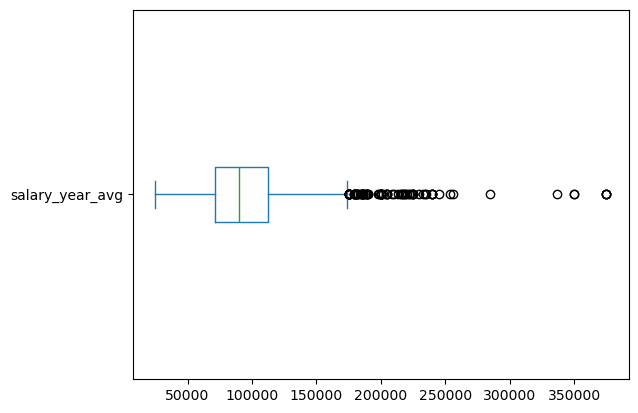

In [14]:
df_vn=df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')]
df_DA_vn=df_vn.dropna(subset='salary_year_avg')
df_DA_vn['salary_year_avg'].sample(10)
df_DA_vn['salary_year_avg'].plot(kind='box',vert=False)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17796\3692732455.py:8: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.boxplot(salary, job_titles, vert=False)


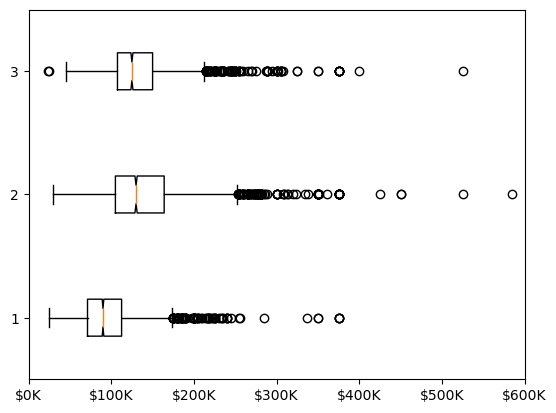

In [75]:
# Return values that only has the desired variables
df_job=df[(df['job_country']=='United States')&(df['job_title_short'].isin(job_titles))]
df_job=df_job.dropna(subset='salary_year_avg')
salary=[df_job[df_job['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
# Use box plot to compare salary of 3 most popular data jobs
job_titles=['Data Analyst', 'Data Scientist', 'Data Engineer']

plt.boxplot(salary, job_titles, vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()